# Final Project Report

* Class: DS 5100
* Student Name: Tatev Gomtsyan
* Student Net ID: tmg6jda
* This URL: https://github.com/tatevmane/tatevmane_ds5100_montecarlo/blob/main/Tatev_FinalProject.ipynb

# Instructions

Follow the instructions in the [Final Project](https://ontoligent.github.io/DS5100-2023-07-R/notebooks/M00_FinalProject/FinalProjectInstructions.html) isntructions and put your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL: https://github.com/tatevmane/tatevmane_ds5100_montecarlo

Paste a copy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

```
#import packages
import numpy as np
import pandas as pd
from typing import List

class Die:
    
    """
    A class representing a single multi-sided die with customizable faces and weights.

    Attributes:
        faces: List of distinct symbols or values that are integers or strings representing each face of the die.
        weights: Dictionary that maps each face to its associated weight.

    Methods:
        __init__(faces: List[str or int]):
            Initializes a Die instance with the provided list of faces, each with default weight 1.

        weight(face: str or int, new_weight: float):
            Changes the weight of a face on the die.

        dice_roll(times: int = 1) -> List[str or int]:
            Rolls the die one or more times and returns a list of outcomes.

        dice_state() -> dict:
            Returns a dictionary containing the current states of the faces and their weights.
    """
    
    def __init__(self, faces: np.array):
        """
      Initializes a Die instance with a list of faces, each having an initial weight of 1.

      Args:
          faces: List of distinct symbols or values that are integers or strings representing the faces of the die.

      Returns:
          None
       """
        if not isinstance(faces, np.ndarray):
            raise TypeError("Faces must be a NumPy array.")
        
        if len(faces) != len(np.unique(faces)):
            raise ValueError("Faces must contain distinct values.")
        
        self.faces = faces
        self.weights = np.ones(len(faces))  # Initialize weights with 1 for each face
        
        self.die = pd.DataFrame({'weights': self.weights}, index = self.faces)
    
    def weight(self, face: str or int, new_weight: float):
        """
      Changes the weight of a specific face on the die.

      Args:
       face (str or int): The face value to change the weight of.
       new_weight (float): The new weight to assign to the face.

      Returns:
       None
       """
       
        if face not in self.faces:
            raise IndexError("Invalid face value.")
        
        if not isinstance(new_weight, (int, float)) or new_weight < 0:
            raise TypeError("Weight must be a non-negative number.")
        
        face_index = np.where(self.faces == face)[0][0]
        self.weights[face_index] = new_weight
        self.die = pd.DataFrame({'weights': self.weights}, index = self.faces)
    
    def dice_roll(self, times: int = 1) -> List[str or int]:
        """
      Rolls the die one or more times and returns the outcomes.

      Args:
       times (int, optional): The number of times to roll the die. Default is 1.

      Returns:
       List[str or int]: A list of outcomes from rolling the die.
       """
       # outcomes = np.random.choice(self.faces, times, p=self.weights / np.sum(self.weights))
        #return outcomes.tolist()
        
        play = np.random.choice(self.faces, times, 
                                 p = self.die['weights'] / np.sum(self.die['weights']))
        final_outcome = play.tolist()
        return final_outcome
    
    def dice_state(self) -> pd.DataFrame:
        """
      Returns a dictionary containing the current state of the die.

      Returns:
       dict: A dictionary with 'faces' and 'weights' keys representing the current state of the die.
       """

        data = {'Faces': self.faces, 'Weights': self.weights}
        state_df = pd.DataFrame(data)
        state_df.set_index('Faces', inplace=True)
        return state_df


# Game class
#objects initialized with die object

class Game:
    """
    Represents a game involving rolling multiple dice.

    Attributes:
        dice_list (List[Die]): List of Die objects representing the dice in the game.

    Methods:
        __init__(dice_list: List[Die]):
            Initializes a Game instance with a list of Die objects.

        play(num_rolls: int):
            Rolls all dice a specified number of times and saves the results.

        show_results(format: str = "wide") -> pd.DataFrame:
            Returns the results of the most recent play in wide or narrow format.
    """
    
    def __init__(self, dice_list):
        """
      Initializes a Game instance with a list of Die objects representing the dice in the game.

      Args:
            dice_list (List[Die]): A list of Die objects representing the dice in the game.

      Returns:
            None
        """
        self.dice_list = dice_list
        self.play_results = pd.DataFrame()

    def play(self, num_rolls: 1):
        """
      Rolls all dice a specified number of times and saves the results.

      Args:
         num_rolls (int): The number of times to roll the dice.

      Returns:
         None
         """
        results = {}
        for index, die in enumerate(self.dice_list):
            results[f"Die_{index}"] = die.dice_roll(num_rolls)
        
        self.play_results = pd.DataFrame(results)
    

    def show_results(self, form = "wide") -> pd.DataFrame:
        """
      Returns the results of the most recent play in wide or narrow format.

      Args:
          form (str, optional): The format for displaying results as either "wide" or "narrow". The default
          is set as "wide".

      Returns:
          pd.DataFrame: The results of the most recent play in the specified format.
      """
      
        if form == 'wide':
            wide_df = self.play_results.copy()
            return wide_df
        
        elif form == "narrow":
            return self.play_results.melt(ignore_index=False, var_name="Die", value_name="Outcome")
        
# Analyzer class
# initialized with game object

class Analyzer:

    """
    Computes descriptive statistical properties about a game's results.

    Attributes:
        game (Game): The game object's results that are being analyzed.

    Methods:
        __init__(game: Game):
            Initializes an Analyzer instance with a Game object for analysis.

        jackpot() -> int:
            Computes the number of jackpot results (all faces are the same) in the game.
            Returns the count of jackpots as an integer.

        face_counts_per_roll(face: str or int) -> pd.DataFrame:
            Computes the count of a specific face rolled in each event (roll).
            Returns a DataFrame with roll numbers as the index, face values as columns, and counts in cells.

        combo_count() -> pd.DataFrame:
            Computes the count of distinct combinations of rolled faces.
            Returns a DataFrame with distinct combinations as the MultiIndex and counts in a column.

        permutation_count() -> pd.DataFrame:
            Computes the count of distinct permutations of rolled faces.
            Returns a DataFrame with distinct permutations as the MultiIndex and counts in a column.
    """
    def __init__(self, game: Game):
        """
      Initializes an Analyzer instance with a Game object for analysis.

      Args:
           game (Game): The Game object's results that will be analyzed.

      Returns:
           None
       """
        if not isinstance(game, Game):
            raise ValueError("Input must be a Game object.")
        
        self.game = game

    def jackpot(self) -> int:
        """
       Computes the number of jackpot results in the game.
       A jackpot is a result where all faces are the same.

       Returns:
           int: The count of jackpot results.
       """
       
        jackpot_count = 0
        for _, row in self.game.play_results.iterrows():
            if row.nunique() == 1:
                jackpot_count += 1
    
        return jackpot_count

    def face_counts_per_roll(self):
        """
        Computes the count of a specific face rolled in each event (roll).

        Args:
            face (str or int): The face value to count occurrences of.

        Returns:
            pd.DataFrame: A DataFrame with roll numbers as the index, face values as columns, and counts in cells.
        """
        
        #return self.game.show_results().apply(pd.Series.value_counts, axis = 1).fillna(0).astype(int)
        face_counts = self.game.play_results.apply(lambda x: x.value_counts()).fillna(0)
        face_counts = face_counts.astype(int)
        return face_counts

    def combo_count(self) -> pd.DataFrame:
        """
        Computes the count of distinct combinations of rolled faces.

        Returns:
            pd.DataFrame: A DataFrame with distinct combinations as the MultiIndex and counts in a column.
        """

        combos = self.game.play_results.apply(lambda x: tuple(sorted(x))).value_counts()
        combos = combos.reset_index()
        return combos

    def permutation_count(self) -> pd.DataFrame:
        """
        Computes the count of distinct permutations of rolled faces.

        Returns:
            pd.DataFrame: A DataFrame with distinct permutations as the MultiIndex and counts in a column.
        """
        #perm_counts = {}
        perms = self.game.play_results.apply(lambda x: tuple(x.tolist())).value_counts()
        perms = perms.reset_index()
        return perms
```

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

```
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Aug 10 10:37:07 2023

@author: tatevgomtsyan
"""

import numpy as np 
import pandas as pd
import unittest
from montecarlo import Die, Game, Analyzer 

class TestMethods(unittest.TestCase):
    
    def test_init_die(self):
        # Test Die initialization
        my_die = Die(np.array([1, 2, 3, 4, 5, 6]))
        faces = [1, 2, 3, 4, 5, 6]
        expected_df = pd.DataFrame({"Weights": [1.0,1.0,1.0,1.0,1.0,1.0]}, index=faces)
        expected_df.index.name = 'Faces'
        actual_df = my_die.dice_state()
        self.assertTrue(actual_df.equals(expected_df))

    def test_weight(self):
        # Test changing weight of a face
        my_die = Die(np.array([1, 2, 3, 4, 5, 6]))
        my_die.weight(1, 2.5)
        self.assertEqual(my_die.weights[0], 2.5)
        
    def test_dice_roll(self):
        # Test rolling the die
        my_die = Die(np.array([1, 2, 3, 4, 5, 6]))
        outcomes = my_die.dice_roll(5)
        self.assertEqual(len(outcomes), 5)
        
    def test_dice_state(self):
        # Test showing the state of the die
        my_die = Die(np.array([1, 2, 3, 4, 5, 6]))
        state = my_die.dice_state()
        #self.assertTrue(isinstance(state, pd.DataFrame))
        self.assertEqual(type(state), pd.DataFrame)
        
    def test_init_game(self):
        my_die1 = Die(np.array([1, 2, 3, 4, 5, 6]))
        my_die2 = Die(np.array([1, 2, 3, 4]))
        game = Game([my_die1, my_die2])
        self.assertEqual(type(game), Game)
        
    def test_play(self):
        my_die1 = Die(np.array([1, 2, 3, 4, 5, 6]))
        my_die2 = Die(np.array([1, 2, 3, 4]))
        game = Game([my_die1, my_die2])
        game.play(10)
        self.assertEqual(game.play_results.shape, (10, 2))

    def test_show_results(self):
        my_die1 = Die(np.array([1, 2, 3, 4, 5, 6]))
        my_die2 = Die(np.array([1, 2, 3, 4]))
        game = Game([my_die1, my_die2])
        game.play(5)
        results = game.show_results(form='wide')
        self.assertEqual(results.shape, (5, 2))
    
    def test_init_analyzer(self):
        my_die1 = Die(np.array([1, 2, 3, 4, 5, 6]))
        my_die2 = Die(np.array([1, 2, 3, 4]))
        game = Game([my_die1, my_die2])
        analyzer = Analyzer(game)
        self.assertEqual(type(analyzer), Analyzer)
    
    def test_jackpot(self):
        my_die1 = Die(np.array([1]))
        game = Game([my_die1])
        game.play(10)
        analyzer = Analyzer(game)
        self.assertEqual(analyzer.jackpot(), 10)

    def test_face_counts_per_roll(self):
        my_die1 = Die(np.array([1]))
        game = Game([my_die1])
        game.play(10)
        analyzer = Analyzer(game)
        self.assertIsInstance(analyzer.face_counts_per_roll(), pd.DataFrame)
        
    def test_combo_count(self):
        my_die1 = Die(np.array([1,2]))
        my_die2 = Die(np.array([1,2]))
        game = Game([my_die1, my_die2])
        game.play(10)
        analyzer = Analyzer(game)
        self.assertIsInstance(analyzer.combo_count(), pd.DataFrame)
    
    def test_permutation_count(self):
        my_die1 = Die(np.array([1,2]))
        game = Game([my_die1])
        game.play(10)
        analyzer = Analyzer(game)
        self.assertEqual(len(analyzer.permutation_count()), 2)   
    

if __name__ == '__main__':
    unittest.main(verbosity=3)
```

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

```
test_combo_count (__main__.TestMethods) ... ok
test_dice_roll (__main__.TestMethods) ... ok
test_dice_state (__main__.TestMethods) ... ok
test_face_counts_per_roll (__main__.TestMethods) ... ok
test_init_analyzer (__main__.TestMethods) ... ok
test_init_die (__main__.TestMethods) ... ok
test_init_game (__main__.TestMethods) ... ok
test_jackpot (__main__.TestMethods) ... ok
test_permutation_count (__main__.TestMethods) ... ok
test_play (__main__.TestMethods) ... ok
test_show_results (__main__.TestMethods) ... ok
test_weight (__main__.TestMethods) ... ok

----------------------------------------------------------------------
Ran 12 tests in 0.013s

OK
```

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successfully imported (1).

In [3]:
import os
os.chdir('/Users/tatevgomtsyan/MSDS/Summer/DS5100/FinalProject')
import montecarlo
from montecarlo import Die, Game, Analyzer

## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [4]:
help(montecarlo)

Help on module montecarlo:

NAME
    montecarlo - Created on Tue Aug  8 10:55:21 2023

DESCRIPTION
    @author: tatevgomtsyan

CLASSES
    builtins.object
        Analyzer
        Die
        Game
    
    class Analyzer(builtins.object)
     |  Analyzer(game: montecarlo.Game)
     |  
     |  Computes descriptive statistical properties about a game's results.
     |  
     |  Attributes:
     |      game (Game): The game object's results that are being analyzed.
     |  
     |  Methods:
     |      __init__(game: Game):
     |          Initializes an Analyzer instance with a Game object for analysis.
     |  
     |      jackpot() -> int:
     |          Computes the number of jackpot results (all faces are the same) in the game.
     |          Returns the count of jackpots as an integer.
     |  
     |      face_counts_per_roll(face: str or int) -> pd.DataFrame:
     |          Computes the count of a specific face rolled in each event (roll).
     |          Returns a DataFrame w

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL:

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

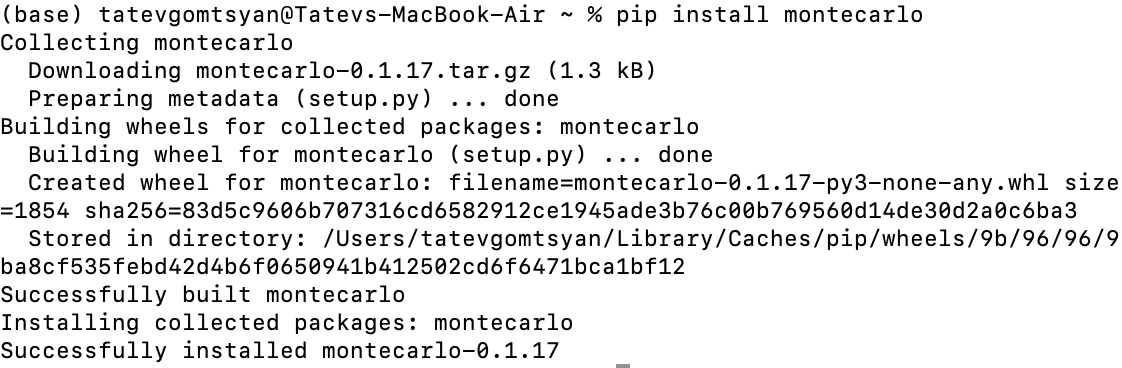

# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

In [5]:
# importing packages 
import numpy as np
import pandas as pd
from montecarlo import Die, Game, Analyzer 
import matplotlib.pyplot as plt 

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [6]:
fair_coin = Die(np.array(['H', 'T']))
fair_coin.dice_state()

,Weights
Faces,
H,1.0
T,1.0


In [7]:
unfair_coin = Die(np.array(['H','T']))
unfair_coin.weight('H', 5)
unfair_coin.dice_state()

,Weights
Faces,
H,5.0
T,1.0


Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [8]:
fair_game = Game([fair_coin, fair_coin])
fair_game.play(1000)
fair = Analyzer(fair_game)
fair.face_counts_per_roll()

,Die_0,Die_1
H,477,509
T,523,491


Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [9]:
unfair_game = Game([unfair_coin, unfair_coin, fair_coin])
unfair_game.play(1000)
unfair = Analyzer(unfair_game)
unfair.face_counts_per_roll()

,Die_0,Die_1,Die_2
H,835,844,524
T,165,156,476


Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [10]:
fair_jackpot = fair.jackpot()
fair_jackpot

516

In [11]:
unfair_jackpot = unfair.jackpot()
unfair_jackpot

391

Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [12]:
fair_freq = fair_jackpot/1000
unfair_freq = unfair_jackpot/1000
print(fair_freq, unfair_freq)

0.516 0.391


Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

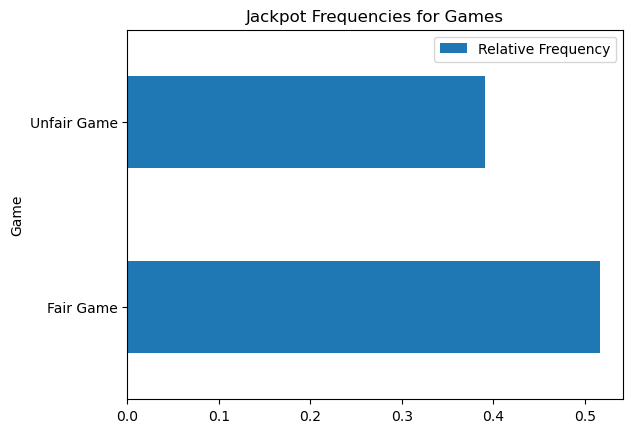

In [13]:
df = pd.DataFrame({'Game':['Fair Game', 'Unfair Game'], 
                   'Relative Frequency':[fair_freq, unfair_freq]})
bar_chart = df.plot.barh(x = 'Game', 
                 y = 'Relative Frequency', 
                 title = 'Jackpot Frequencies for Games')

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [14]:
die1 = Die(np.array([1,2,3,4,5,6]))
die2 = Die(np.array([1,2,3,4,5,6]))
die3 = Die(np.array([1,2,3,4,5,6]))

Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [15]:
die1.weight(6, 5)
die1.dice_state()

,Weights
Faces,
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,5.0


Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [16]:
die1.weight(5, 1)
die1.dice_state()

,Weights
Faces,
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,5.0


Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [17]:
fair_game1 = Game([die3, die3, die3, die3, die3])
fair_game1.play(10000)
dice1 = Analyzer(fair_game1)
dice1.face_counts_per_roll()

,Die_0,Die_1,Die_2,Die_3,Die_4
1,1634,1687,1580,1638,1696
2,1649,1695,1678,1602,1675
3,1656,1664,1714,1695,1672
4,1664,1684,1650,1706,1651
5,1695,1634,1684,1689,1689
6,1702,1636,1694,1670,1617


Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [18]:
game2 = Game([die1, die2, die3, die3, die3])
game2.play(10000)
analysis2 = Analyzer(game2)
analysis2.face_counts_per_roll()

,Die_0,Die_1,Die_2,Die_3,Die_4
1,1052,1579,1621,1734,1659
2,1014,1697,1655,1675,1660
3,1037,1674,1743,1616,1711
4,1044,1710,1637,1652,1663
5,1009,1665,1715,1701,1670
6,4844,1675,1629,1622,1637


Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

In [19]:
j1 = dice1.jackpot()
j2 = analysis2.jackpot()
print(j1, j2)

6 13


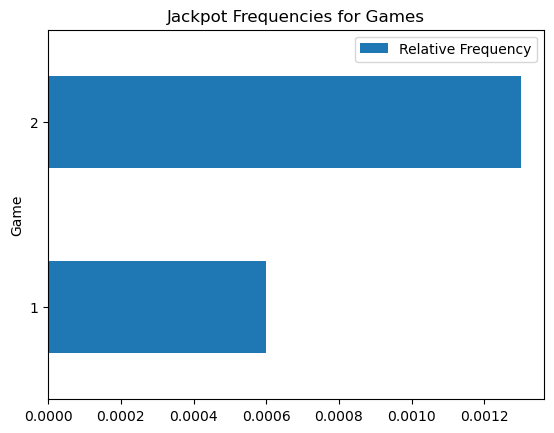

In [20]:
df = pd.DataFrame({'Game':['1', '2'], 
                   'Relative Frequency':[j1/10000, j2/10000]})
plot = df.plot.barh(x = 'Game', 
                 y = 'Relative Frequency', 
                 title = 'Jackpot Frequencies for Games')

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [27]:
weights = pd.read_csv('english_letters.txt', sep = " ", header = None)
weights.head()

,0,1
0,E,529117365
1,T,390965105
2,A,374061888
3,O,326627740
4,I,320410057


In [28]:
alpha = weights[0].tolist()
weights = weights[1].tolist()

die = Die(np.array(alpha))

for f, face in enumerate(alpha):
    die.weight(face, weights[f])
    
die.dice_state()

,Weights
Faces,
E,529117365.0
T,390965105.0
A,374061888.0
O,326627740.0
I,320410057.0
N,313720540.0
S,294300210.0
R,277000841.0
H,216768975.0


Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [30]:
game = Game([die, die, die, die])
game.play(1000)
a1 = Analyzer(game)
df1 = a1.face_counts_per_roll()
df1

,Die_0,Die_1,Die_2,Die_3
A,69,79,74,82
B,17,12,16,15
C,28,37,33,31
D,40,32,42,44
E,134,128,127,126
F,15,23,16,17
G,31,13,26,16
H,45,46,50,55
I,81,89,86,78
J,0,0,2,1


Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [31]:
scrabble = pd.read_csv("/Users/tatevgomtsyan/MSDS/Summer/DS5100/FinalProject/scrabble_words.txt", header=None)

In [32]:
scrabble

,0
0,AA
1,AAH
2,AAHED
3,AAHING
4,AAHS
...,...
279491,ZYTHUMS
279492,ZYZZYVA
279493,ZYZZYVAS
279494,ZZZ


In [34]:
permcount = a1.permutation_count()
permcount['word'] = permcount['Die_0'] + permcount['Die_1'] + permcount['Die_2'] + permcount['Die_3']
words = permcount['word'].isin(scrabble[0])
words.sum()

59

Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

In [35]:
game = Game([die, die, die, die, die])
game.play(1000)
a2 = Analyzer(game)
df2 = a2.face_counts_per_roll()
df2

,Die_0,Die_1,Die_2,Die_3,Die_4
A,89,90,77,89,81
B,17,17,17,21,12
C,28,28,39,26,45
D,30,39,38,26,38
E,115,110,132,109,136
F,23,25,23,28,20
G,24,19,15,24,25
H,40,63,50,53,46
I,63,78,78,82,69
J,3,0,4,2,1


In [37]:
permcount = a2.permutation_count()
permcount['word'] = permcount['Die_0'] + permcount['Die_1'] + permcount['Die_2'] + permcount['Die_3'] + permcount['Die_4']
words = permcount['word'].isin(scrabble[0])
words.sum()

7

# Submission

When finished completing the above tasks, save this file to your local repo (and within your project), and them push it to your GitHub repo.

Then convert this file to a PDF and submit it to GradeScope according to the assignment instructions in Canvas.